In [13]:
library("here")
library(devtools)
library(Seurat)

load_all('/home/jpm73279/Socrates')

ℹ Loading Socrates

Warning message:
"replacing previous import 'scales::viridis_pal' by 'viridis::viridis_pal' when loading 'Socrates'"


In [14]:
# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Osativa/v7.0/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/"

os_leaf_rep_1 <- paste0(analysis_path, "Os.merged_rep1.unique.mpq10.tn5.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "os.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"annotation/Osativa_323_v7.0.gene.gff3")
chr <- paste0(reference_genome_path,"assembly/Osativa_323_v7.0.chrom.sizes")
pre <- "Os.Leaf"



#Load Object
os_leaf_rep_1 <- loadBEDandGenomeData(os_leaf_rep_1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/Os.merged_rep1.unique.mpq10.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Osativa/v7.0/annotation/Osativa_323_v7.0.gene.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Osativa/v7.0/assembly/Osativa_323_v7.0.chrom.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data



In [15]:
# call ACRs
os_temp_dir <- paste0(analysis_path, "os_peaks.tmp")
os.obj.acrs <- callACRs(os_leaf_rep_1, genomesize=3.37e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=os_temp_dir,
                verbose=T)

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/os_peaks.tmp' already exists"


In [16]:
os.obj.acrs.meta <- buildMetaData(os.obj.acrs,
                                     tss.window=2000,
                                     verbose=TRUE)

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...



Making Dotplot



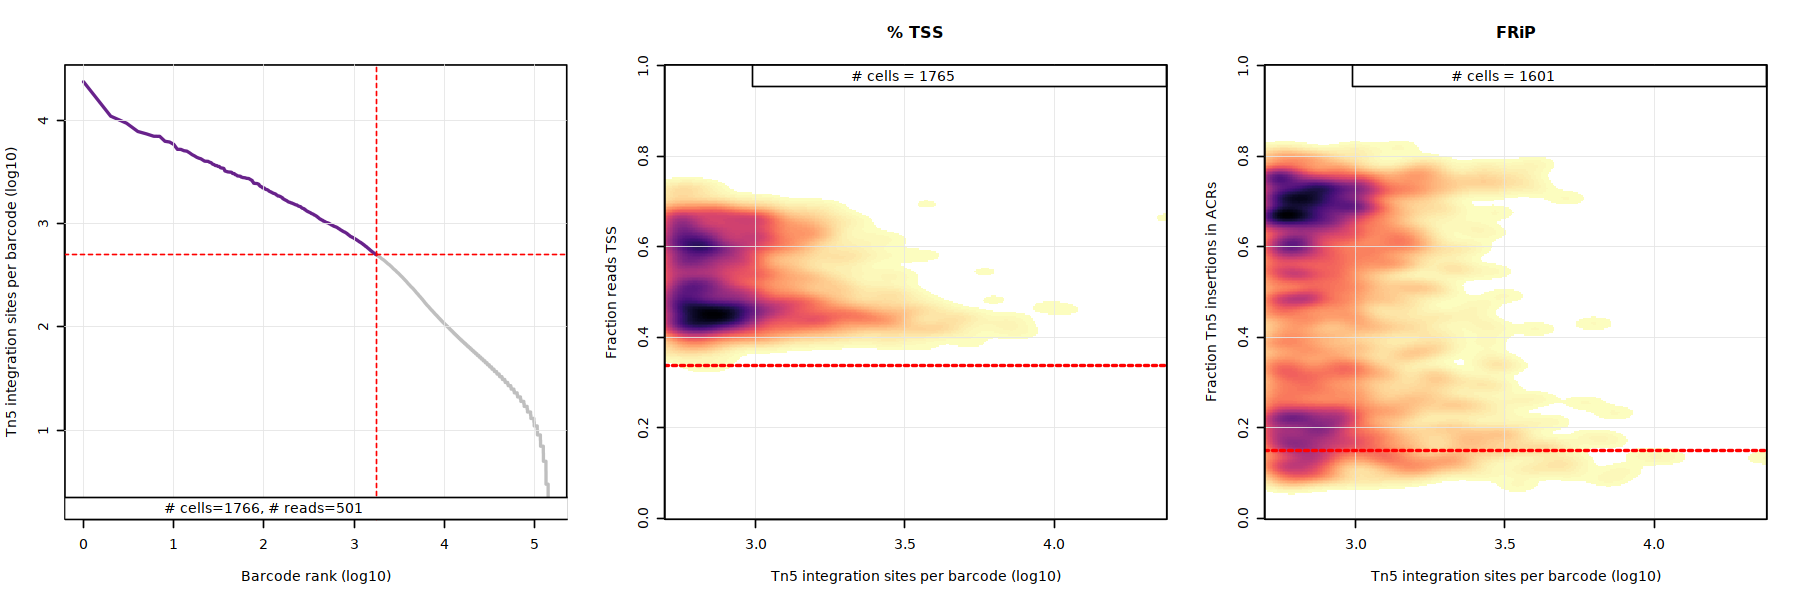

In [18]:
library(repr)

options(repr.plot.width=15, repr.plot.height=5)
os_leaf_rep_1.meta_file <- findCells(os.obj.acrs.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=10000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.05,
                                        frip.min.freq=0.15,
                                        filt.org = FALSE,
                                        prefix=NULL)


In [15]:
# generate sparse matrix
sb_leaf_rep_1.meta_file.filtered <- generateMatrix(os_leaf_rep_1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

In [16]:
pre <- "Os.Leaf_rep1"
# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(sb_leaf_rep_1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(analysis_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(analysis_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(sb_leaf_rep_1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)

 - converting triplet format to sparseMatrix

Warning message in gzfile(file, mode):
"cannot open compressed file '/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/QC_output/Os.Leaf_rep1_QC_obj.rds', probable reason 'No such file or directory'"


ERROR: Error in gzfile(file, mode): cannot open the connection


In [17]:
library(tidyverse)
as_tibble(sb_leaf_rep_1.filtered.sparse$meta)  %>% 
    summarise(total_m = mean(total, na.rm = TRUE),
             total_tss = mean(tss, na.rm = TRUE),
             total_acrs = mean(acrs, na.rm = TRUE),
             total_nsites = mean(nSites, na.rm = TRUE))

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::accumulate() masks foreach::accumulate()
✖ readr::col_factor() masks Socrates::col_factor(), scales::col_factor()
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()      masks matrixStats::count()
✖ dplyr::desc()       masks IRanges::desc()
✖ purrr::discard()    masks Socrates::discard(), scales::discard()
✖ tidyr::expand()     masks Socrates::expand(), S4Vectors::expand(), Matrix::expand()
✖ tidyr::fill()       masks VGAM::fill()
✖ dpl

total_m,total_tss,total_acrs,total_nsites
<dbl>,<dbl>,<dbl>,<dbl>
751.1172,387.898,370.2879,429.5859


## Replicate 2

In [22]:
# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Osativa/v7.0/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/"

os_leaf_rep_2 <- paste0(analysis_path, "Os.merged_rep2.unique.mpq10.tn5.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "os.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"annotation/Osativa_323_v7.0.gene.gff3")
chr <- paste0(reference_genome_path,"assembly/Osativa_323_v7.0.chrom.sizes")
pre <- "Os.Leaf"



#Load Object
os_leaf_rep_2 <- loadBEDandGenomeData(os_leaf_rep_2, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/Os.merged_rep2.unique.mpq10.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Osativa/v7.0/annotation/Osativa_323_v7.0.gene.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Osativa/v7.0/assembly/Osativa_323_v7.0.chrom.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data



In [23]:
# call ACRs
sb_temp_dir <- paste0(analysis_path, "os_peaks.rep2.tmp")
sb_leaf_rep_2.no_organelle.acrs <- callACRs(os_leaf_rep_2, genomesize=1.8e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/os_peaks.rep2.tmp' already exists"


In [24]:
sb_leaf_rep_2.meta <- buildMetaData(sb_leaf_rep_2.no_organelle.acrs,
                                     tss.window=2000,
                                     verbose=TRUE,
                                     organelle_scaffolds= c("Pt", "Mt"))

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...



Making Dotplot



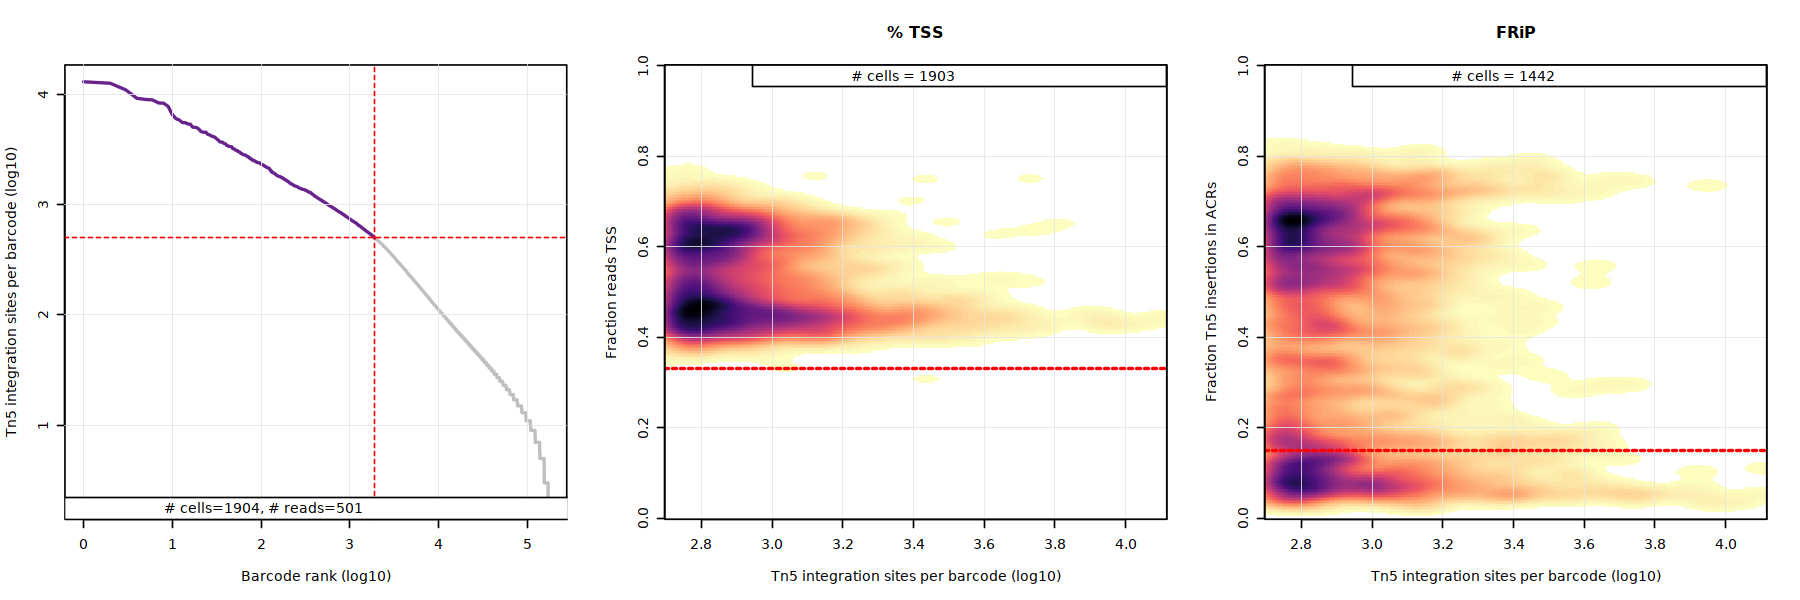

In [25]:
library(repr)

options(repr.plot.width=15, repr.plot.height=5)
sb_leaf_rep_2.meta_file <- findCells(sb_leaf_rep_2.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=10000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=0.15,
                                        filt.org = FALSE,
                                        prefix=NULL)


In [26]:
# generate sparse matrix
sb_leaf_rep_2.meta_file.filtered <- generateMatrix(sb_leaf_rep_2.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

In [24]:
pre <- "Sb.Leaf_rep2"
# convert to Socrates format for downstream analysis.-
sb_leaf_rep_2.filtered.sparse <- convertSparseData(sb_leaf_rep_2.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_2.save  <- paste0(analysis_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_2.save  <- paste0(analysis_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(sb_leaf_rep_2.meta_file.filtered, file=sb.obj.leaf_rep_2.save)
saveRDS(sb_leaf_rep_2.filtered.sparse, file=sb.soc.leaf_rep_2.save)

 - converting triplet format to sparseMatrix



# Take QC Metrics for Excel

In [1]:
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/"


sb_replicate_1 <- readRDS("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output/Sb.Leaf_rep1_QC_soc_obj.rds")
sb_replicate_2 <- readRDS("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output/Sb.Leaf_rep2_QC_soc_obj.rds")

In [15]:
mean(sb_replicate_1$meta$total)
mean(sb_replicate_2$meta$total)

[1] 7198.828

[1] 7796.669

In [2]:
mean(sb_replicate_1$meta$tss)
mean(sb_replicate_2$meta$tss)

[1] 4079.982

[1] 4428.76

In [3]:
mean(sb_replicate_1$meta$acrs)
mean(sb_replicate_2$meta$acrs)

[1] 5165.285

[1] 5604.85

In [4]:
mean(sb_replicate_1$meta$nSites)
mean(sb_replicate_2$meta$nSites)

[1] 3802.73

[1] 4100.407

# Per Plate QC

In [27]:
remaining_files_list <- list("Rice_P1","Rice_P10_10x.rep2","Rice_P5_10x.rep2","Rice_P6_10x.rep2",
                             "Rice_P7_10x.rep2","Rice_P8_10x.rep2","Rice_P1.rep1","Rice_P3_10x.rep1",
                             "Rice_P2_10x.rep1","Rice_P4_10x.rep1")


for (i in remaining_files_list) {
    

reference_genome_path <- "/home/jpm73279/genome_downloads/Osativa/v7.0/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/"

    
Uro_P1.rep1 <- paste0(analysis_path, paste0(i,".unique.mpq10.tn5.bed"))
ann <- paste0(reference_genome_path,"annotation/Osativa_323_v7.0.gene.gff3")
chr <- paste0(reference_genome_path,"assembly/Osativa_323_v7.0.chrom.sizes")
pre <- "Os.Leaf"


pre <- i

output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/oryza_sativa/"
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/oryza_sativa/QC_output/imgs/"

    
#Load Object
Uro_P1.leaf.rep1 <- loadBEDandGenomeData(Uro_P1.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

# call ACRs
sb_temp_dir <- paste0(analysis_path, paste0(pre, "peaks.tmp"))
Uro_P1.leaf.rep1.acrs <- callACRs(Uro_P1.leaf.rep1, genomesize=2.8e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

Uro_P1.leaf.rep1.meta <- buildMetaData(Uro_P1.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE)



options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=2000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=paste0(output_path_imgs, pre))

# generate sparse matrix
Uro_P1.leaf.rep1.meta_file.filtered <- generateMatrix(Uro_P1.leaf.rep1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)


# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Uro_P1.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Uro_P1.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)
    
}


Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/Rice_P1.unique.mpq10.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Osativa/v7.0/annotation/Osativa_323_v7.0.gene.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Osativa/v7.0/assembly/Osativa_323_v7.0.chrom.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data

 - running MACS2 on bulk BED file ...

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...

Making Dotplot

 - converting triplet format to sparseMatrix

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/oryza_sativa/Ri

 - running MACS2 on bulk BED file ...

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...

Making Dotplot

 - converting triplet format to sparseMatrix



In [30]:
remaining_files_list <- list("Rice_P10_10x.rep2","Rice_P5_10x.rep2","Rice_P6_10x.rep2",
                             "Rice_P7_10x.rep2","Rice_P8_10x.rep2","Rice_P1.rep1","Rice_P3_10x.rep1",
                             "Rice_P2_10x.rep1","Rice_P4_10x.rep1")


output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/oryza_sativa/"

df <- data.frame(matrix(ncol = 5, nrow = 0))
colnames(df)<-c("plate", "mean_total", "mean_tss", "mean_acrs", "mean_nsites")

for (i in remaining_files_list) {
    output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/oryza_sativa/"

    meta_file_reads <- readRDS(paste0(output_path,"QC_output/",i, "_QC_soc_obj.rds"))
    
    mean_total <- (mean(meta_file_reads$meta$total))
    mean_tss <- (mean(meta_file_reads$meta$tss))
    mean_acrs <- mean(meta_file_reads$meta$acrs)
    mean_nSites <- mean(meta_file_reads$meta$nSites)

    combined_row <- c(i, mean_total, mean_tss, mean_acrs, mean_nSites)
    df <- rbind(df,combined_row)

}

In [31]:
df

X.Rice_P10_10x.rep2.,X.531.81917211329.,X.189.09477124183.,X.266.677559912854.,X.300.551198257081.
<chr>,<chr>,<chr>,<chr>,<chr>
Rice_P10_10x.rep2,531.81917211329,189.09477124183,266.677559912854,300.551198257081
Rice_P5_10x.rep2,553.293969849246,202.697236180905,278.629396984925,309.413316582915
Rice_P6_10x.rep2,582.857819905213,215.31990521327,285.505924170616,336.399289099526
Rice_P7_10x.rep2,490.226141078838,176.103734439834,286.582987551867,277.906639004149
Rice_P8_10x.rep2,566.614345114345,192.581081081081,311.845114345114,318.443866943867
Rice_P1.rep1,728.537894736842,251.527368421053,373.309473684211,416.322105263158
Rice_P3_10x.rep1,546.352156057495,190.387063655031,317.415811088296,312.93839835729
Rice_P2_10x.rep1,633.478873239437,240.549295774648,307.30985915493,360.052112676056
Rice_P4_10x.rep1,535.107382550336,195.4451901566,270.959731543624,303.696868008949
